<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Tarea semanal Nº 6
#### Tatiana Galansky, Guadalupe Cura

### INTRODUCCIÓN TEÓRICA
En el dominio continuo, la función de transferencia $T(s)$ describe la relación entre la salida y la entrada de un sistema LTI, proporcionando una descripción completa de su comportamiento. En el diseño de filtros de orden superior, es habitual descomponer $T(s)$ en un producto de secciones de primer y segundo orden. Las secciones de segundo orden o bicuadráticas (SOS, del inglés *Second-Order Sections*) son las más utilizadas, ya que permiten implementar filtros complejos de manera estable y modular. Una SOS tiene la forma general:
$$T(s) = k \cdot \frac{s^2 + s \frac{\omega_{0Z}}{Q_Z} + \omega_{0Z}^2}{s^2 + s \frac{\omega_{0P}}{Q_P} + \omega_{0P}^2}     \qquad (1)$$
Esta representación depende de cinco parámetros clave: la ganancia $k$, las frecuencias naturales de polos y ceros ($\omega_{0P}$​, $\omega_{0Z}$​) y sus factores de calidad ($Q_P$​, $Q_Z$​). La frecuencia natural define la ubicación de polos y ceros, mientras que el factor $Q$ mide la selectividad del filtro: valores altos de $Q$ generan respuestas más resonantes o picos más marcados en frecuencia.

Los polos y ceros determinan la forma general de la respuesta del filtro. Los polos (raíces del denominador) definen la estabilidad y el comportamiento transitorio, mientras que los ceros (raíces del numerador) indican las frecuencias atenuadas. Para que el sistema sea estable, todos los polos deben estar en el semiplano izquierdo del plano $s$.

La respuesta en frecuencia se obtiene al reemplazar $s=j\Omega$ en $T(s)$, obteniendo
$T(j\Omega) = |T(j\Omega)| e^{j \angle T(j\Omega)}$. El módulo representa la ganancia del filtro y la fase, el desplazamiento aplicado a cada componente frecuencial. La ubicación de polos cercanos al eje imaginario produce picos en la magnitud, especialmente cuando el factor $Q$ es alto, lo que define el carácter resonante del sistema.


### ANÁLISIS Y DESARROLLO
En primer lugar, se pidió demostrar que la función transferencia $T(s)$ asociada al siguiente circuito corresponde a la ecuación (1).


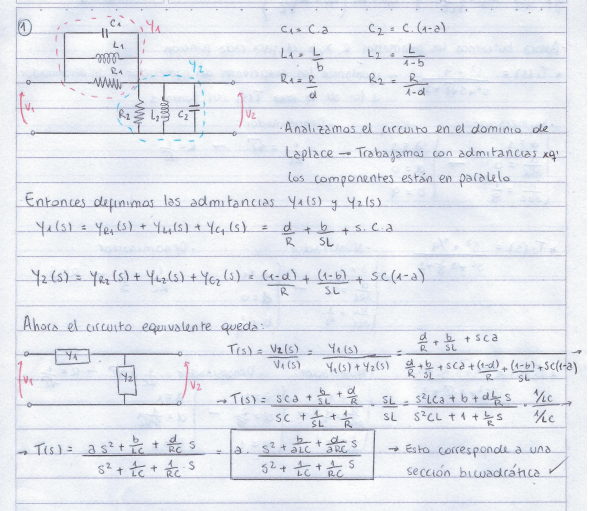

Luego se hallaron los parámetros de la ecuación (1) en función de los elementos de la red.

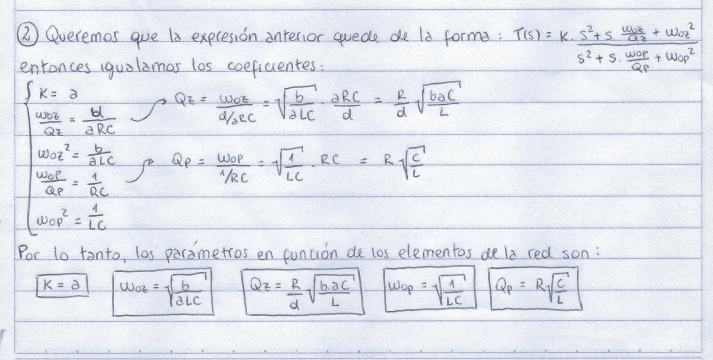

A continuación se utilizó la red bicuadrática para implementar tres funciones de transferencia distintas $T_1(s)$, $T_2(s)$ y $T_3(s)$.


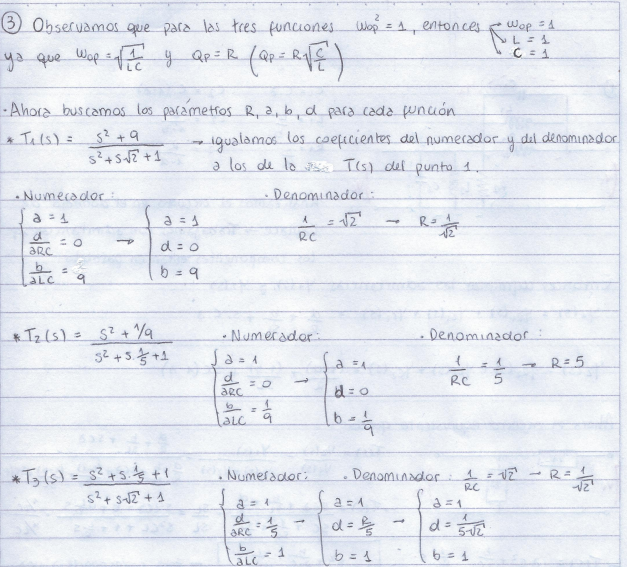

Para seguir con el desarrollo de la tarea semanal, se buscaron los ceros y los polos de las funciones de transferencia anteriores. 
    

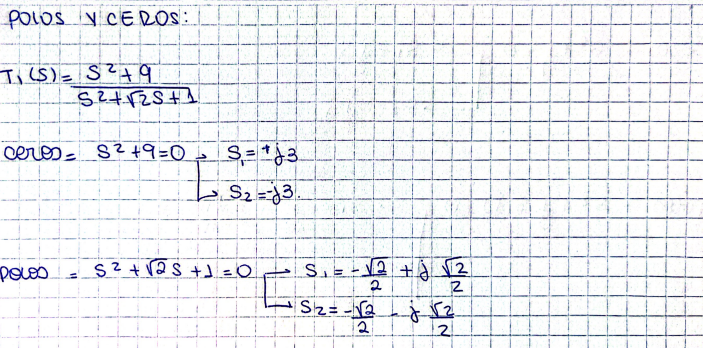

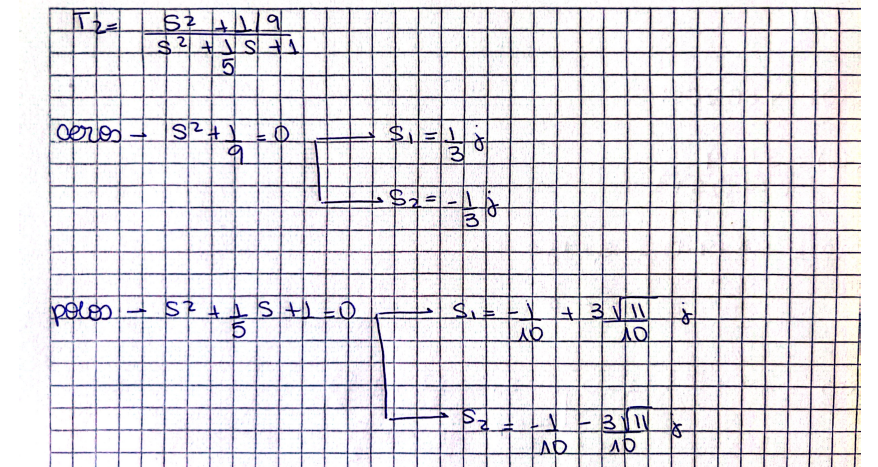

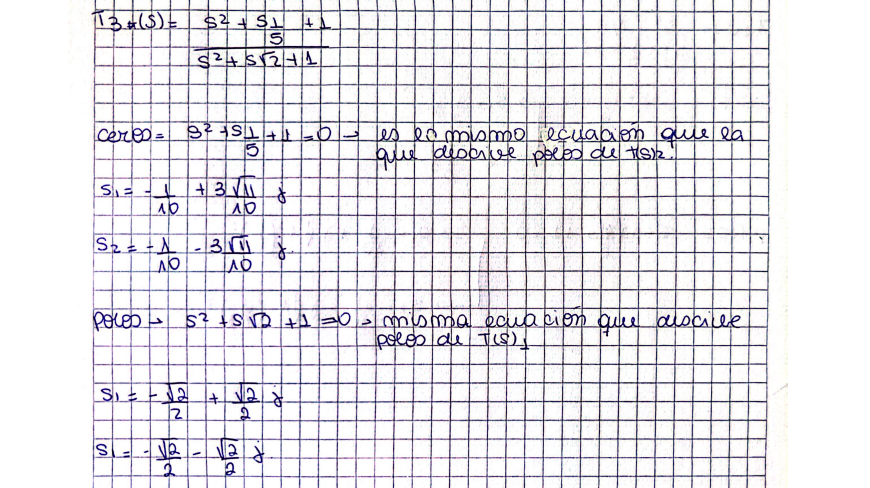

Para poder obtener una respuesta gráfica, se implementó un código con el fin de graficar los polos y los ceros de las funciones a la vez que se calcula y grafica la respuesta en módulo y fase de las funciones transferencia. 
Gracias a esto, se pudo evaluar el comportamiento de los sistemas con diferentes variables. 
Gráficamente lo que se espera ver es una respuesta en módulo asintótica que varía dependiendo el Q, esto es, mientras mayor sea el Q, aumenta la pendiente en dB.

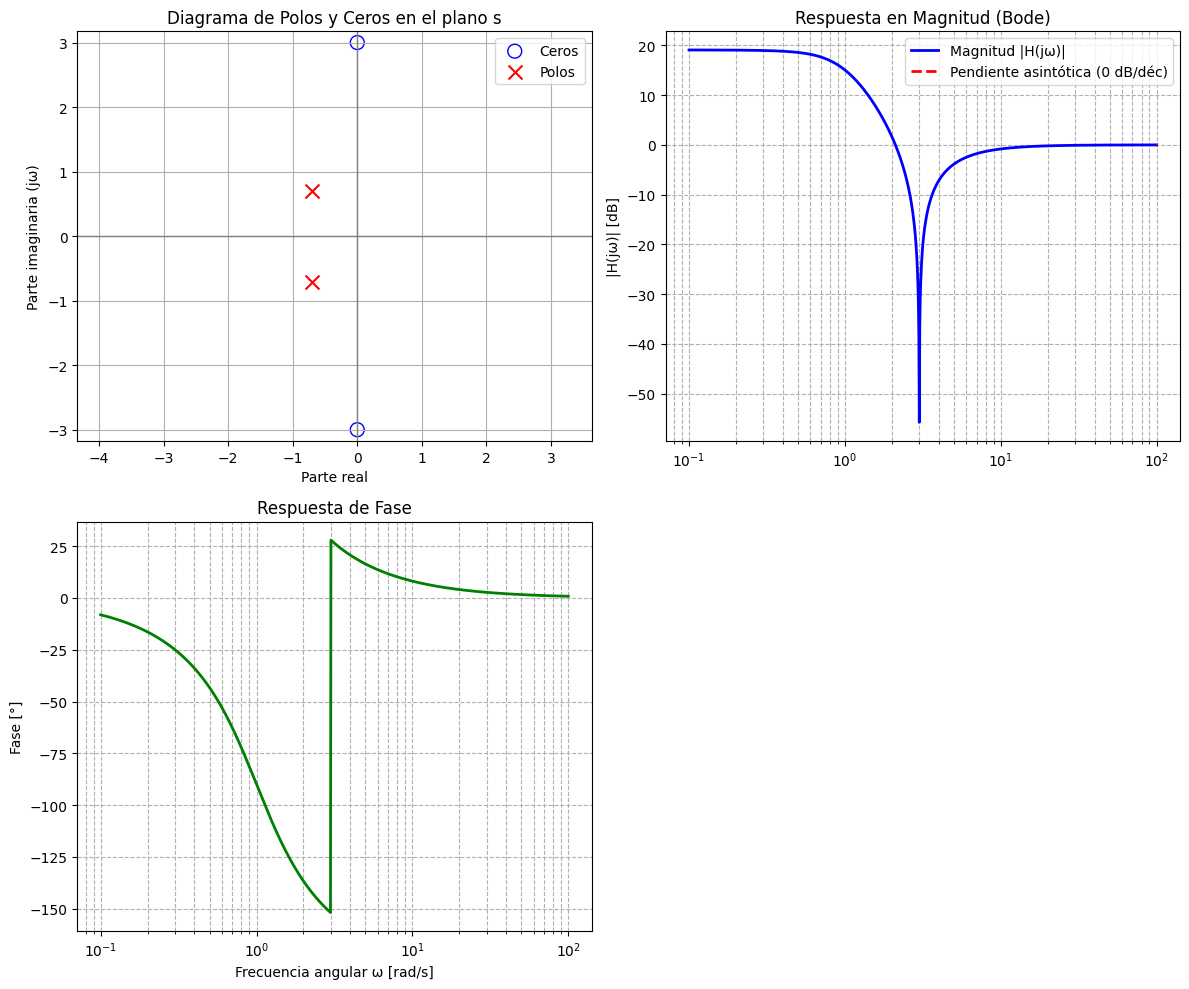

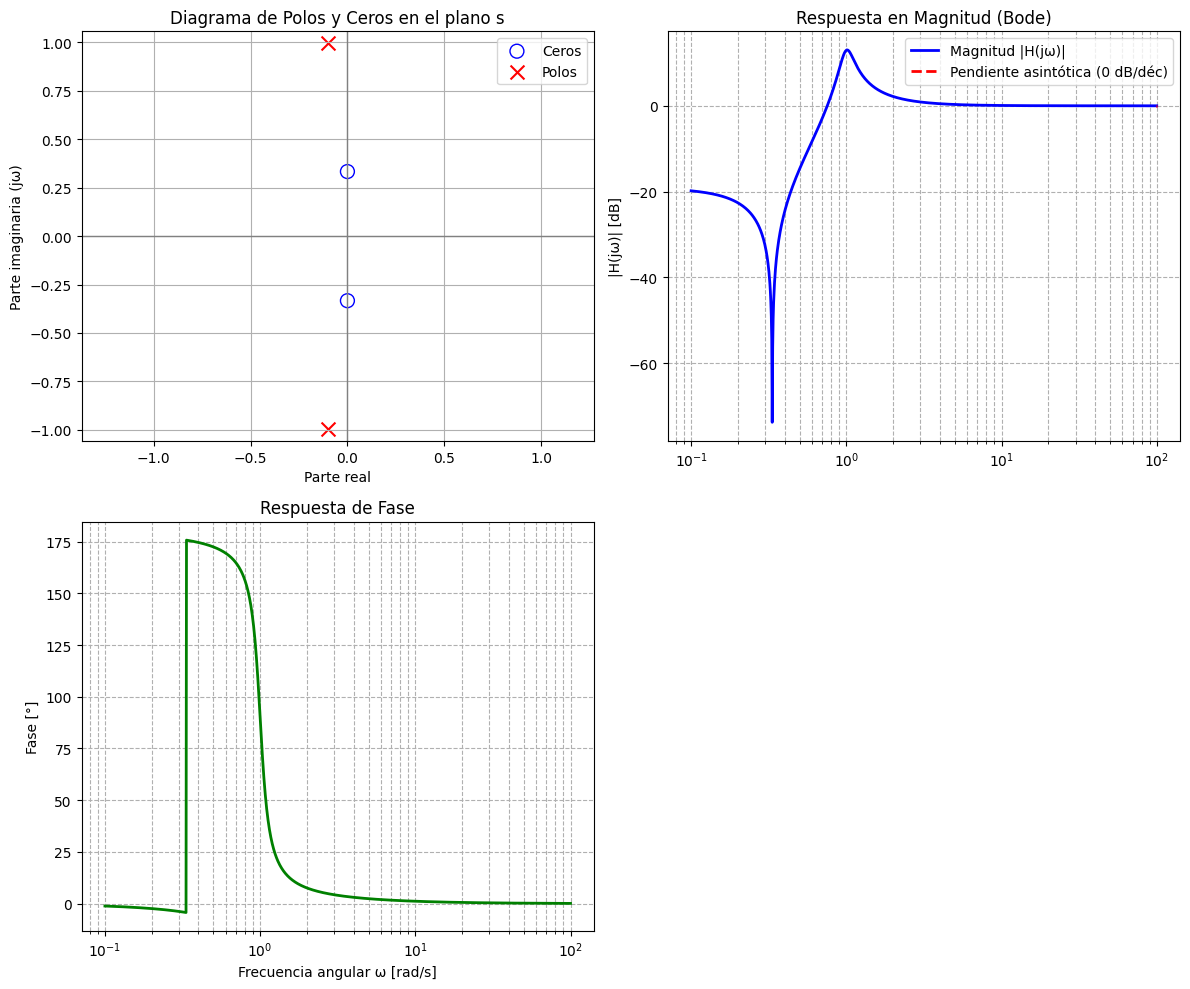

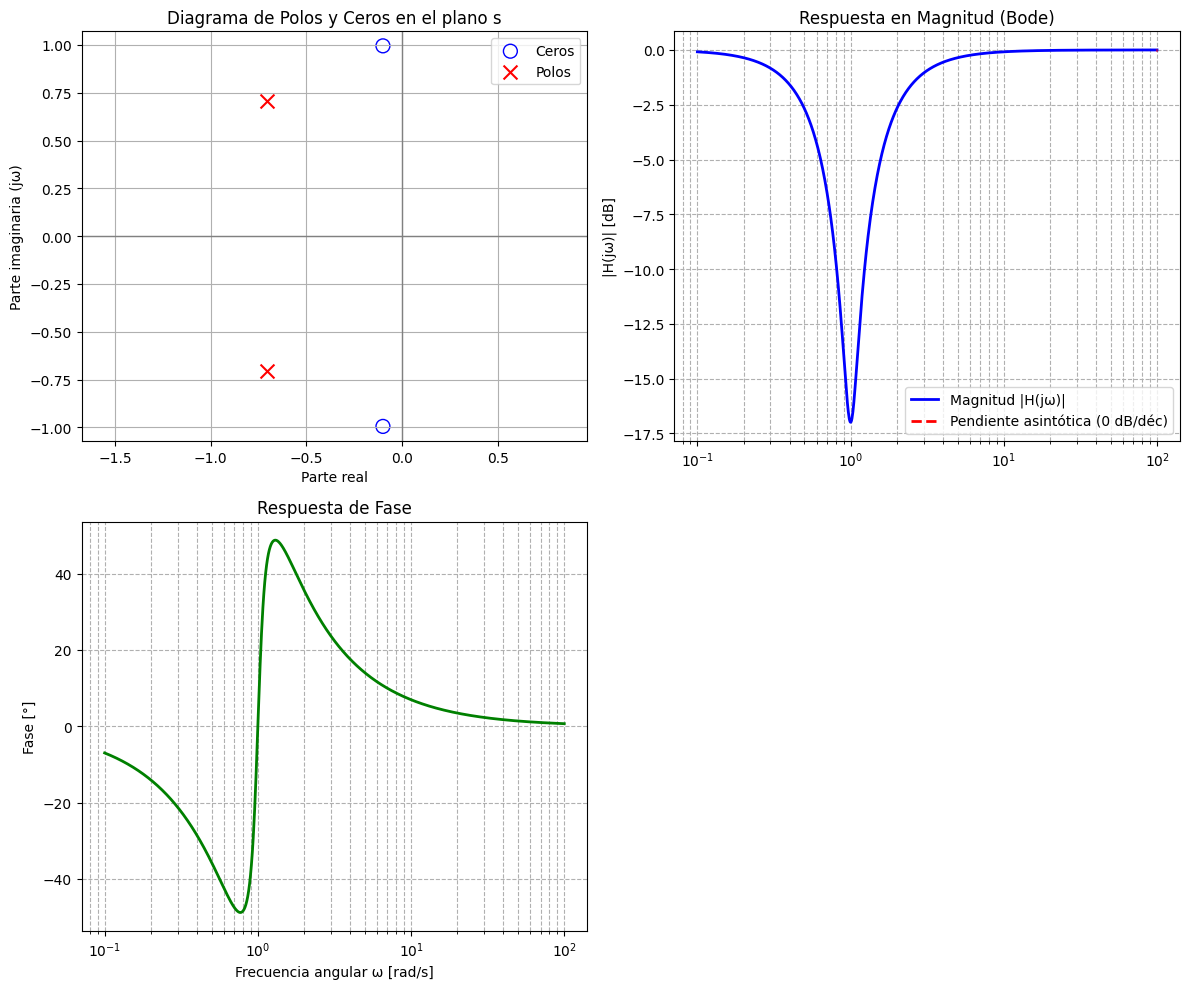

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_system_analysis(zeros, poles, k=1, w_range=(1e-1, 1e2), n_points=1000):
    # --- Crear la función de transferencia H(s) ---
    num = k * np.poly(zeros)
    den = np.poly(poles)
    system = signal.lti(num, den)
    
    # --- Configuración de gráficas ---
    plt.figure(figsize=(12, 10))
    
    # --- Diagrama de polos y ceros ---
    plt.subplot(2, 2, 1)
    plt.axhline(0, color='gray', lw=1)
    plt.axvline(0, color='gray', lw=1)
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='b', s=100, label='Ceros')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', s=100, label='Polos')
    plt.title("Diagrama de Polos y Ceros en el plano s")
    plt.xlabel("Parte real")
    plt.ylabel("Parte imaginaria (jω)")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    
    # --- Respuesta en frecuencia ---
    w = np.logspace(np.log10(w_range[0]), np.log10(w_range[1]), n_points)
    w, h = signal.freqs(num, den, worN=w)
    
    # --- Módulo en decibelios ---
    plt.subplot(2, 2, 2)
    magnitude = 20 * np.log10(np.abs(h))
    plt.semilogx(w, magnitude, 'b-', linewidth=2, label='Magnitud |H(jω)|')
    
    # Pendiente asintótica
    slope_db_dec = 20 * (len(zeros) - len(poles))
    w_line = np.array([w[-3], w[-1]])
    mag_line_start = magnitude[-3]
    mag_line = mag_line_start + slope_db_dec * np.log10(w_line / w_line[0])
    plt.semilogx(w_line, mag_line, 'r--', linewidth=2, label=f'Pendiente asintótica ({slope_db_dec} dB/déc)')
    plt.title("Respuesta en Magnitud (Bode)")
    plt.ylabel("|H(jω)| [dB]")
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    # --- Fase ---
    plt.subplot(2, 2, 3)
    phase = np.unwrap(np.angle(h))
    phase_deg = np.degrees(phase)
    plt.semilogx(w, phase_deg, 'g-', linewidth=2)
    plt.title("Respuesta de Fase")
    plt.ylabel("Fase [°]")
    plt.xlabel("Frecuencia angular ω [rad/s]")
    plt.grid(True, which="both", ls="--")
    
    plt.tight_layout()
    plt.show()
    
    return system

# --- Funciones de transferencia ---
def T1():
    zeros = [3j, -3j]
    polos = [-np.sqrt(2)/2 + 1j*np.sqrt(2)/2, -np.sqrt(2)/2 - 1j*np.sqrt(2)/2]
    return plot_system_analysis(zeros, polos, k=1)

def T2():
    zeros = [1j/3, -1j/3]
    polos = [-0.1 + 0.994987j, -0.1 - 0.994987j]
    return plot_system_analysis(zeros, polos, k=1)

def T3():
    zeros = [-0.1 + 0.994987j, -0.1 - 0.994987j]
    polos = [-np.sqrt(2)/2 + 1j*np.sqrt(2)/2, -np.sqrt(2)/2 - 1j*np.sqrt(2)/2]
    return plot_system_analysis(zeros, polos, k=1)

# --- Ejecución ---
if __name__ == "__main__":
    sistema1 = T1()
    sistema2 = T2()
    sistema3 = T3()


La función T1(s) presenta ceros en ±3j y polos en -0.707 ± 0.707j, configurando un filtro de tipo notch o rechazo de banda. Este comportamiento se caracteriza por una atenuación pronunciada en la frecuencia correspondiente a los ceros (3 rad/s), mientras mantiene ganancia significativa tanto en bajas como en altas frecuencias. La respuesta de fase exhibe una variación continua que comienza cerca de 0° en frecuencia cero, desciende hasta aproximadamente -150° en la región de transición, y retorna progresivamente hacia 0° a altas frecuencias, demostrando el efecto combinado de polos y ceros sobre el desplazamiento de fase.

En contraste, la función T2(s) con ceros en ±j/3 y polos en -0.1 ± 0.995j muestra una respuesta de magnitud que presenta una atenuación en bajas frecuencias, seguida de un incremento gradual hasta alcanzar su máximo alrededor de 1 rad/s, para luego decrecer suavemente a frecuencias superiores. La respuesta de fase asociada inicia en 180°, experimenta una transición pronunciada que la lleva a valores negativos en la banda de frecuencias medias, y finalmente se estabiliza gradualmente hacia 0° a medida que la frecuencia aumenta, reflejando la contribución de los polos poco amortiguados al retardo de fase.

La función T3(s) presenta una configuración particular donde tanto los polos como los ceros se ubican en regiones similares del plano complejo, generando una respuesta en frecuencia distintiva. El gráfico de módulo muestra un comportamiento que comparte características con T1(s), presentando un pico decreciente centrado alrededor de determinadas frecuencias. Sin embargo, a diferencia de otros casos analizados, la magnitud de T3(s) tiende progresivamente a cero tanto hacia frecuencias muy bajas como hacia frecuencias muy elevadas, configurando un perfil de respuesta que sugiere un comportamiento de filtro pasa-banda.

Es importante distinguier que todas las funciones con las que trabajamos, tienden a cero a medida que la frecuencia aumenta.

Cuando dos circuitos se conectan en cascada, la función de transferencia total del sistema resultante corresponde al producto de las funciones de transferencia individuales de cada etapa. Este principio fundamental se sustenta en conceptos básicos de teoría de circuitos y tiene implicaciones prácticas significativas en el diseño de sistemas electrónicos.

La multiplicación directa de funciones de transferencia es válida cuando se cumplen condiciones específicas de acoplamiento entre las etapas. La condición esencial requiere que la impedancia de salida del primer circuito sea significativamente menor que la impedancia de entrada del segundo circuito. Esta relación de impedancias asegura que la etapa posterior no cargue excesivamente a la etapa anterior, preservando así las características de respuesta en frecuencia de cada bloque individual. En la práctica, esto se logra mediante el uso de amplificadores operacionales configurados como seguidores de voltaje o etapas con ganancia que presentan alta impedancia de entrada y baja impedancia de salida.

En el caso particular de los filtros Sallen-Key, su arquitectura inherente los hace especialmente adecuados para conexiones en cascada. Estos filtros, que implementan funciones de transferencia de segundo orden, están diseñados con amplificadores operacionales que proporcionan un excelente aislamiento entre etapas. La alta impedancia de entrada típica de los circuitos con amplificadores operacionales, combinada con su baja impedancia de salida, crea condiciones ideales para la conexión en cascada sin necesidad de circuitos de acoplamiento adicionales.

Para el ejercicio específico que involucra las funciones de transferencia Ts1 y Ts2, ambas correspondientes a filtros Sallen-Key, la conexión en cascada se realiza mediante la multiplicación directa de sus funciones de transferencia, obteniendo el siguiente resultado:



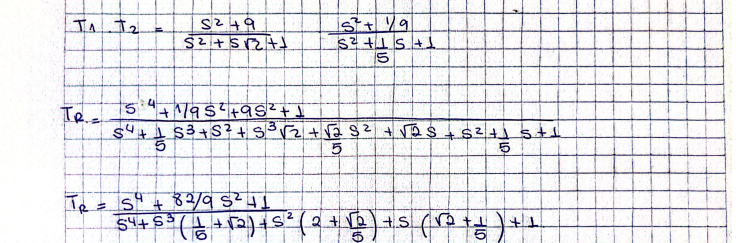

Aquí $T_{R}$ representa la función transferencia resultante.

## CONCLUSIÓN
 
 En el contexto del ejercicio bonus desarrollado, la función de transferencia obtenida a partir de la cascada de Ts1 y Ts2 evidencia cómo dos filtros de segundo orden pueden combinarse para dar lugar a un filtro de cuarto orden. Este resultado ilustra de manera concreta que la respuesta en frecuencia del sistema compuesto es el producto de las respuestas individuales, validando así el principio teórico de multiplicación de funciones de transferencia. Además, esta observación ofrece una herramienta práctica para el diseño de filtros de orden superior en el ámbito del procesamiento de señales analógicas.

El comportamiento del módulo de la función de transferencia resultante está fuertemente determinado por la ubicación de los polos y ceros en el plano complejo, ya que estos definen tanto la forma como las características de la respuesta en frecuencia. Los ceros introducen atenuaciones o cancelaciones en determinadas frecuencias, mientras que los polos establecen las frecuencias de resonancia y el ancho de banda del filtro. Un desplazamiento de los polos hacia el eje imaginario, por ejemplo, incrementa la selectividad del sistema y acentúa el pico de resonancia, mientras que polos más alejados generan una respuesta más amortiguada y estable. De manera complementaria, la posición relativa entre polos y ceros influye directamente en la pendiente de atenuación y en la planitud de la banda pasante, aspectos fundamentales para caracterizar el comportamiento global del filtro.

#### AUTOEVALUACIÓN DEL APRENDIZAJE
Para llevar a cabo la tarea semanal nos juntamos y trabajamos juntas. Utilizamos la inteligencia artificial para ayudarnos con el código, además de utilizar funciones utilizadas en clase.
No nos quedó muy claro cómo indicar la respuesta asintótica.

#### BIBLIOGRAFÍA
Holton, T. (2021). *Digital Signal Processing: Principles and Applications*. Cambridge University Press.
